<a href="https://colab.research.google.com/github/NDsasuke/Gradient-decent--simplex-method--Binary-linear-programming/blob/main/Simplex%20Method/Minimization_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries
These lines are importing the required libraries. numpy is for numerical operations, matplotlib.pyplot for plotting, and linprog from scipy.optimize is used to solve linear programming problems.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Define the Linear Programming Problem
These lines are defining the linear programming problem. c is the coefficients of the objective function, A is the inequality constraints matrix, b is the inequality constraints vector, and x0_bounds, x1_bounds are the bounds for the variables.

In [26]:
# Coefficients of the objective function
c = [1, 1]

# Inequality constraints matrix
A = [[-1, -1], [1, -1]]

# Inequality constraints vector
b = [-2, -1]

# Bounds for variables
x0_bounds = (0, None)
x1_bounds = (0, None)

#Solve the Linear Programming Problem
The linprog function is used to solve the linear programming problem. The result is stored in res. The optimal value of the objective function and the optimal values of the variables are then printed.

In [27]:
# Solve the linear programming problem
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='simplex')

<ipython-input-27-a4ece2dd75ab>:2: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='simplex')


In [28]:
print('Optimal value:', res.fun, '\nX:', res.x)

Optimal value: 2.0 
X: [0.5 1.5]


#Define the Plotting Function
The function plot_feasible_region is defined to create a visualization of the linear programming problem. It starts by creating a grid of x and y values using numpy's linspace and meshgrid functions.

#Plot the Constraints and Shade the Feasible Region
The constraints are plotted as contour lines using matplotlib's contour function. The feasible region, which is the region that satisfies all constraints, is then determined and shaded using numpy's all function and matplotlib's imshow function.

#Plot the Objective Function
The objective function is plotted for different constant values, illustrating how the objective function changes as the values of the variables change.

#Mark the Optimal Solution and Display the Plot
The optimal solution is marked with a red star using matplotlib's plot function. The boundaries of the plot are set using xlim and ylim, and a legend is added with legend. The plot is then displayed using show.

In [29]:
def plot_feasible_region(A, b, res):
    # Create grid
    x = np.linspace(0, 3, 100)
    y = np.linspace(0, 3, 100)
    x, y = np.meshgrid(x, y)

    # Define constraints
    plt.figure(figsize=(8, 8))
    c1 = plt.contour(x, y, A[0][0]*x + A[0][1]*y, [b[0]], colors='blue')
    plt.clabel(c1, inline=True, fontsize=10)
    c2 = plt.contour(x, y, A[1][0]*x + A[1][1]*y, [b[1]], colors='red')
    plt.clabel(c2, inline=True, fontsize=10)

    # Shade feasible region
    feasible_region = np.all([A[0][0]*x + A[0][1]*y <= b[0],
                              A[1][0]*x + A[1][1]*y <= b[1]], 0)
    plt.imshow(feasible_region, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', alpha=0.3)

    # Plot objective function for different values
    c_values = np.linspace(res.fun, res.fun+2, 3)
    for c in c_values:
        plt.plot(x, (c - x) / 1, label=f'x1 + x2 = {c}', linestyle='--')

    # Mark the optimal solution
    plt.plot(res.x[0], res.x[1], 'r*', markersize=15)

    plt.xlim(0, 3)
    plt.ylim(0, 3)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.show()


#Call the Plotting Function
The plot_feasible_region function is finally called to create the plot. The constraints and the result of the linear programming problem are passed as arguments.

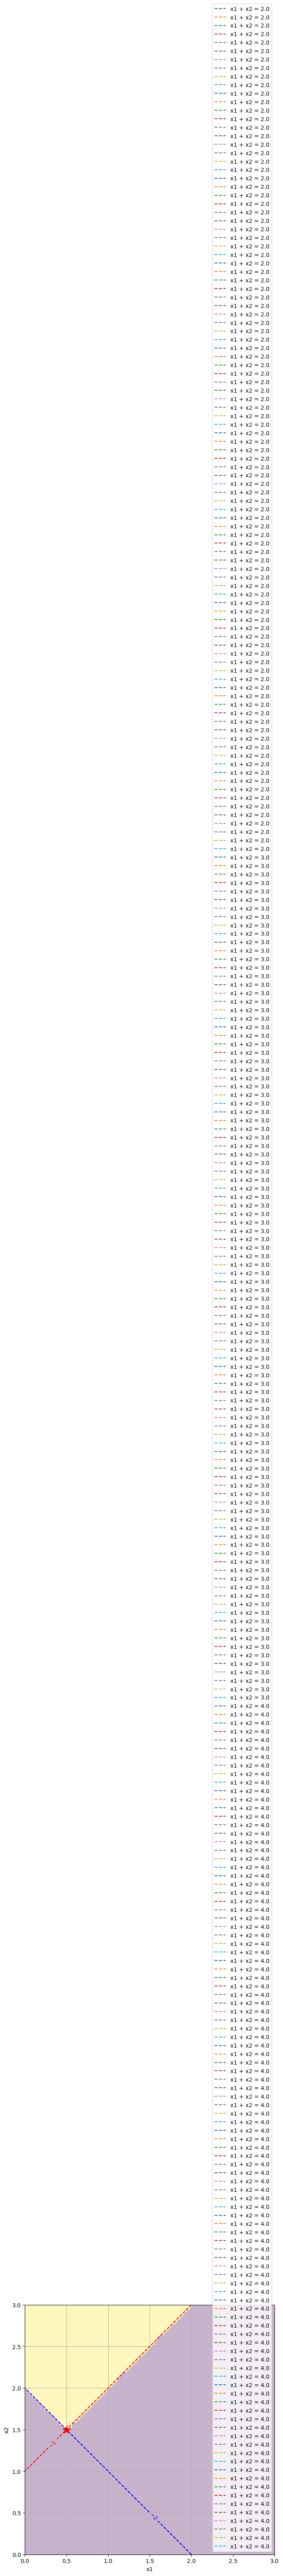

In [30]:
# Call the function to create the plot
plot_feasible_region(A, b, res)